# import Python Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Data Acquisition

In [5]:
df = pd.read_csv('spam_dataset.csv', encoding = 'ISO-8859-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
df.shape


(5572, 5)

## Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [12]:
df.isnull().sum

<bound method DataFrame.sum of          v1     v2  Unnamed: 2  Unnamed: 3  Unnamed: 4
0     False  False        True        True        True
1     False  False        True        True        True
2     False  False        True        True        True
3     False  False        True        True        True
4     False  False        True        True        True
...     ...    ...         ...         ...         ...
5567  False  False        True        True        True
5568  False  False        True        True        True
5569  False  False        True        True        True
5570  False  False        True        True        True
5571  False  False        True        True        True

[5572 rows x 5 columns]>

In [14]:
df.dtypes


v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

### Remove unwanted columns from datset

In [16]:

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [17]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### changing the column names

In [18]:
df.rename(columns = {'v1': 'Target' , 'v2':'Text'}, inplace = True)


In [19]:
df.head()
# ham = legitimate

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### checking for null values

In [20]:
df.isna().sum()


Target    0
Text      0
dtype: int64

In [21]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

#### checking duplicate values

In [22]:
df.duplicated().sum()

403

#### drop Duplicates values

In [23]:
df = df.drop_duplicates()

In [24]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


###### you can see the difference previously there was 5572 rows now 5169 rows which is correct difference of 403

### Data PreProcessing

##### Converting Target column into numerical 0 and 1

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [26]:
df['Target'] = encoder.fit_transform(df['Target'])

C:\Users\gjgau\AppData\Local\Temp\ipykernel_76\478920943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = encoder.fit_transform(df['Target'])


In [28]:
df


,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


###### transformed

#

Exploratory Data Analysis(EDA)

In [31]:
df['Target'].value_counts() # ham = 0 ,spam = 1

Target
0    4516
1     653
Name: count, dtype: int64

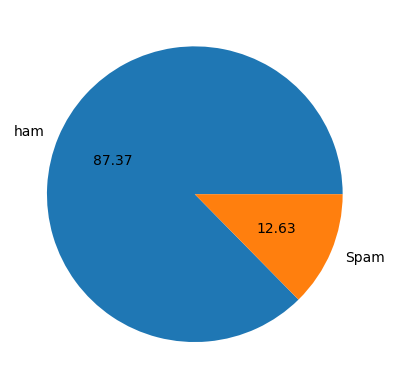

In [32]:
plt.pie(df['Target'].value_counts(), labels= ['ham', 'Spam'], autopct = '%.2f')
plt.show()

### Data PreProcessing

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gjgau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer

In [38]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

In [41]:
def process_text(text):
    text = text.lower()
    text = re.sub(r'@\S+',  '' ,text)# removal of special character like '@'
    text = re.sub(r'.pic\S+' , '' , text) # removal of media file link like .png , .pic etc
    text = re.sub(r'http\S+' , '' , text) # removal of URL
    text = re.sub(r'[^a-zA-Z+]' , ' ', text) # replacing non alphabatic character with space
    text = "".join([i for i in text if i not in string.punctuation]) # remove the punctuation from the string 
    words = nltk.word_tokenize(text) # separate the string into different tokens
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2]) # remove the stop words and all the remaining words with space
    text = re.sub(r"\s+", " ",text).strip() # replace multiple spaces with a single space
    text = " ".join(stemmer.stem(word) for word in words)
    return text
    

In [44]:
df['transformed_text']  = df['Text'].apply(process_text)

C:\Users\gjgau\AppData\Local\Temp\ipykernel_76\3813100165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']  = df['Text'].apply(process_text)


In [54]:
df

,Target,Text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in a wkli comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goe to usf he live around...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,thi is the nd time we have tri contact u u hav...
5568,0,Will Ì_ b going to esplanade fr home?,will b go to esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti wa in mood for that so ani other suggest
5570,0,The guy did some bitching but I acted like i'd...,the guy did some bitch but i act like i d be i...


## ML MODEL

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [52]:
# !pip install wordcloud



In [51]:
from wordcloud import WordCloud

In [53]:
vectorizer = CountVectorizer()
# .fit_transform(X_train)
X_train_vec = vectorizer.fit_transform(df['transformed_text'])
print("Shape of X :", X_train_vec.shape)

Shape of X : (5169, 6292)


In [57]:
X_train_vec


<5169x6292 sparse matrix of type '<class 'numpy.int64'>'
	with 65790 stored elements in Compressed Sparse Row format>

In [55]:
y = df['Target'].values

In [56]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
X_train, X_test ,Y_train, Y_test = train_test_split(X_train_vec.toarray(), y , test_size = 0.2, random_state = 2)

In [63]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)


MultinomialNB()

In [84]:
y_pred1 = mnb.predict(X_test)

In [68]:
print(classification_report(y_pred1 , Y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       882
           1       0.91      0.83      0.87       152

    accuracy                           0.96      1034
   macro avg       0.94      0.91      0.92      1034
weighted avg       0.96      0.96      0.96      1034



In [71]:
print(confusion_matrix(Y_test, y_pred1))

[[870  26]
 [ 12 126]]


In [74]:
bnb = BernoulliNB()

In [75]:
bnb.fit(X_train, Y_train)

BernoulliNB()

In [76]:
y_pred2 = bnb.predict(X_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
print(classification_report(y_pred2 , Y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       909
           1       0.86      0.94      0.90       125

    accuracy                           0.97      1034
   macro avg       0.92      0.96      0.94      1034
weighted avg       0.98      0.97      0.97      1034



In [79]:
gnb = GaussianNB()

In [80]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [81]:
y_pred3 = gnb.predict(X_test)

In [82]:
print(classification_report(y_pred3, Y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       822
           1       0.85      0.55      0.67       212

    accuracy                           0.89      1034
   macro avg       0.87      0.76      0.80      1034
weighted avg       0.88      0.89      0.88      1034



#

## Now using TF-IDF vector transformation

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
tfidf = TfidfVectorizer()

In [91]:
X = tfidf.fit_transform(df['transformed_text'])

In [92]:
print("Shape of X:" ,X.shape)

Shape of X: (5169, 6292)


In [93]:
yn = df['Target'].values


In [100]:
x_train1, x_test1, y_train, y_test = train_test_split(X.toarray(), yn ,test_size = 0.2 , random_state = 42) 

In [102]:
llm = MultinomialNB()

In [105]:
llm.fit(x_train1, y_train)

MultinomialNB()

In [106]:
yy = llm.predict(x_test1)

In [108]:
print(classification_report(yy, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       932
           1       0.69      0.98      0.81       102

    accuracy                           0.95      1034
   macro avg       0.84      0.97      0.89      1034
weighted avg       0.97      0.95      0.96      1034



In [110]:
llmb = BernoulliNB()

In [111]:
llmb.fit(x_train1, y_train)

BernoulliNB()

In [113]:
y_pred11 = llmb.predict(x_test1)

In [114]:
print(classification_report(y_pred11  , y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       903
           1       0.86      0.95      0.90       131

    accuracy                           0.97      1034
   macro avg       0.92      0.96      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [115]:
ggnb = GaussianNB()

In [116]:
ggnb.fit(x_train1 , y_train)

GaussianNB()

In [121]:
prediction = ggnb.predict(x_test1) 

In [122]:
print(classification_report(prediction, y_test))


              precision    recall  f1-score   support

           0       0.87      0.97      0.92       797
           1       0.83      0.51      0.63       237

    accuracy                           0.86      1034
   macro avg       0.85      0.74      0.78      1034
weighted avg       0.86      0.86      0.85      1034



# Conclusion

## so we concluded that vectorization transformation is more powerfull technique for getting accurate prdiciton of spam message instead of TF-IDF